In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib.patches import Circle

data = pd.read_csv('Real estate.csv')
data = data.drop(['No'], axis=1)

In [9]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
data.shape

(414, 7)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [12]:
data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [13]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


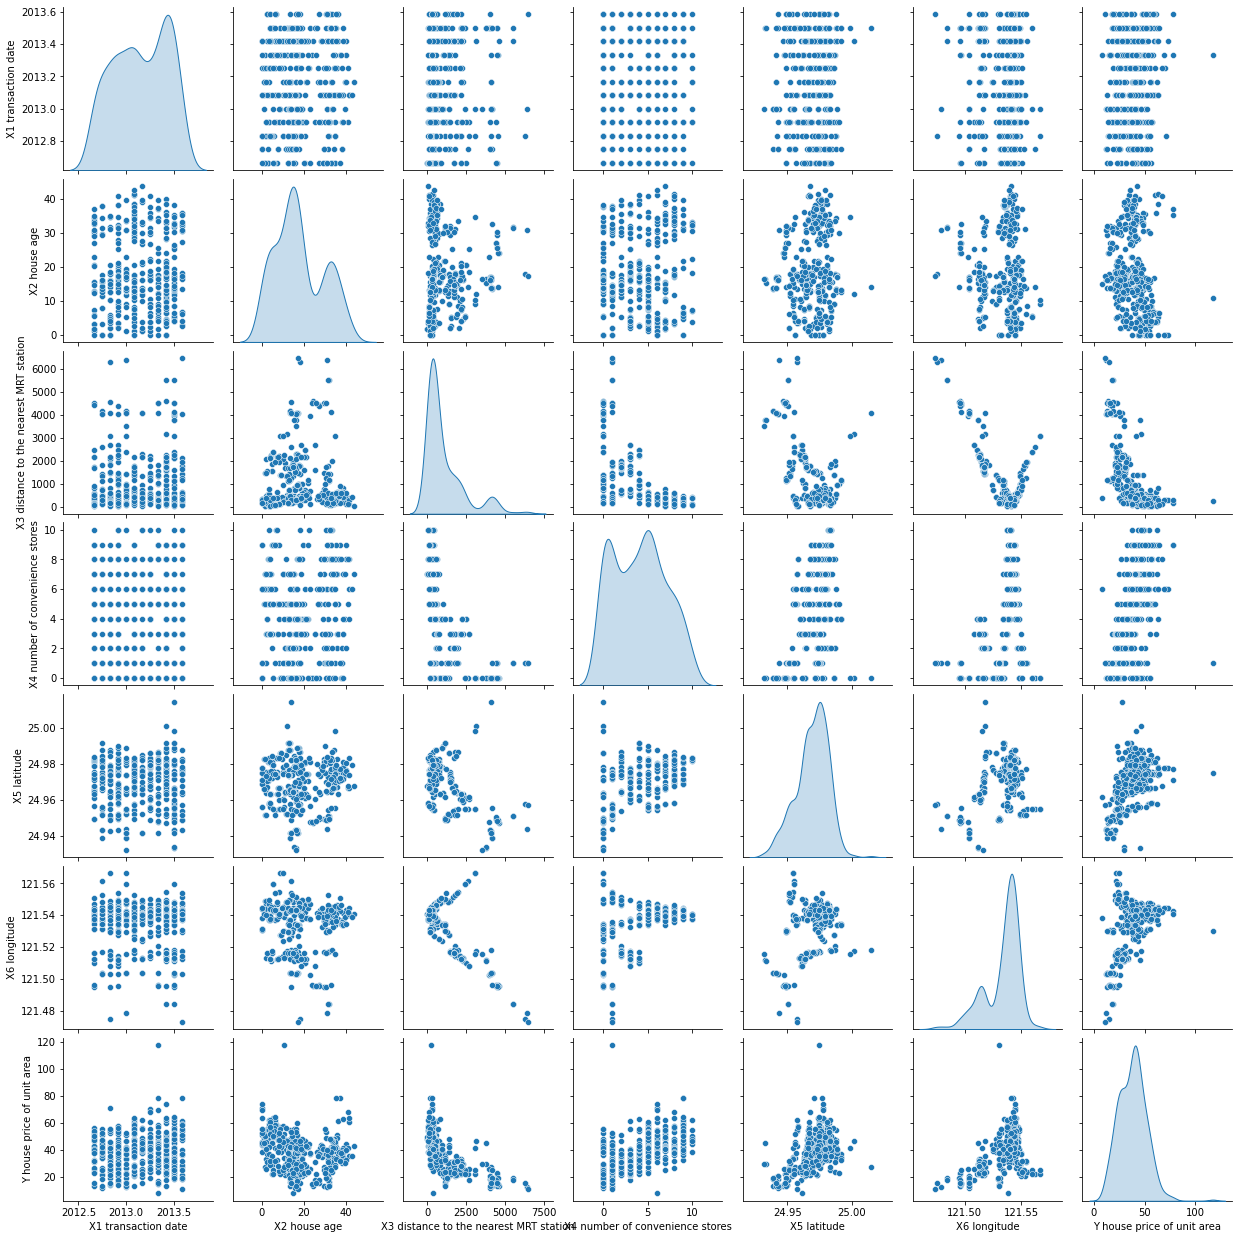

In [14]:
sns.pairplot(data, diag_kind='kde')

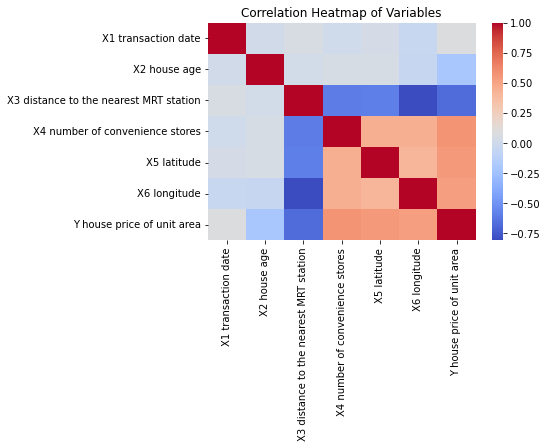

In [16]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Variables")
plt.show()

In [17]:
X= data.drop('Y house price of unit area', axis=1)
y= data['Y house price of unit area']

In [21]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Tue, 20 Jun 2023   Prob (F-statistic):           4.86e-74
Time:                                06:04:28   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [27]:
X= data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']]

In [28]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.950
Model:                                    OLS   Adj. R-squared (uncentered):              0.949
Method:                         Least Squares   F-statistic:                              1546.
Date:                        Tue, 20 Jun 2023   Prob (F-statistic):                   4.77e-263
Time:                                06:06:32   Log-Likelihood:                         -1499.0
No. Observations:                         414   AIC:                                      3008.
Df Residuals:                             409   BIC:                                      3028.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

In [29]:
from sklearn.preprocessing import StandardScaler

Xstd = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(Xstd)


PCA()

In [30]:
print(pca.explained_variance_ratio_)

[0.41931685 0.20612434 0.19626275 0.1110295  0.06726655]


In [31]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.41931685 0.6254412  0.82170395 0.93273345 1.        ]


In [44]:
print(pca.components_)

[[ 0.01043339 -0.03870498  0.60923978 -0.56229398 -0.55771448]
 [-0.71884069 -0.68048829 -0.1197749  -0.02428152 -0.07258184]
 [-0.68690319  0.72553024  0.02256516 -0.00316034 -0.03536529]
 [-0.04216911 -0.0084429   0.00968391 -0.69831864  0.71442829]
 [-0.09769843 -0.09472164  0.78350361  0.44224086  0.41476252]]


In [34]:
X_pca = pca.transform(Xstd)

In [46]:
model = sm.OLS(y, X_pca).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.066
Model:                                    OLS   Adj. R-squared (uncentered):              0.055
Method:                         Least Squares   F-statistic:                              5.789
Date:                        Tue, 20 Jun 2023   Prob (F-statistic):                    3.53e-05
Time:                                02:40:23   Log-Likelihood:                         -2104.0
No. Observations:                         414   AIC:                                      4218.
Df Residuals:                             409   BIC:                                      4238.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

In [35]:
ccircle = []
eucl_dist = []
for column_name in X.columns:
    corr1 = np.corrcoef(X[column_name],X_pca[:,0])[0,1]
    corr2 = np.corrcoef(X[column_name],X_pca[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

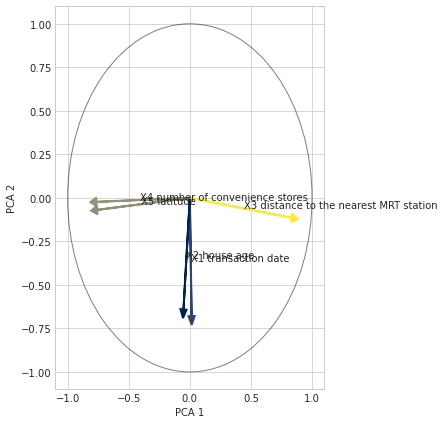

In [36]:
from matplotlib.patches import Circle

with plt.style.context(('seaborn-whitegrid')):
    fig, axs = plt.subplots(figsize=(6, 6))
    for i,j in enumerate(eucl_dist):
        arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min())/\
                                (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
        axs.arrow(0,0, # Arrows start at the origin
                 ccircle[i][0],  #0 for PC1
                 ccircle[i][1],  #1 for PC2
                 lw = 2, # line width
                 length_includes_head=True, 
                 color = arrow_col,
                 fc = arrow_col,
                 head_width=0.05,
                 head_length=0.05)
        axs.text(ccircle[i][0]/2,ccircle[i][1]/2, X.columns[i])
    # Draw the unit circle, for clarity
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)
    axs.set_xlabel("PCA 1")
    axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

<AxesSubplot:>

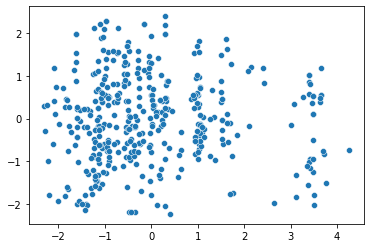

In [41]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])